---
layout: default
title: "Logistic Regression - Model Representation"
categories: logisticRegression
permalink: /ML5/
order: 5
comments: true
---

In [1]:
%pylab --no-import-all inline
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# Classification problems and Logistic regression

Classification problems are a type of supervised learning where input variables are mapped to a predicted value $(y)$, which assumes discrete values. In the simplest case:

$$y \in \{0,1\}$$

Where $0$ can sometimes be called the "Negative class" and $1$ the "Positive class". The designation of $0$ being negative and $1$ positive is arbitrary. And this arbitrary associations reflects the intuition that $1$ means presence of something while $0$ means absence of something.

In multiclass classification problems $y \in \{0,1,\dots,n\}$ but we will start from binary classification problems

Let's take an example where we have to predict if a tumor is malignant ($y=1$) or bening ($y=0$) from the tumor size. Let's say that we have this situation.

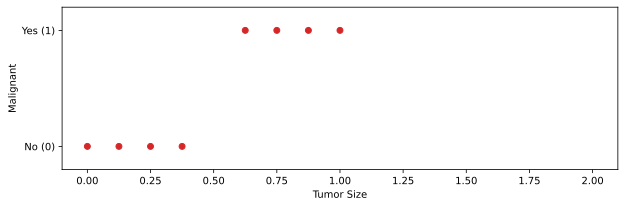

In [2]:
x = np.delete(np.linspace(0, 1, 9), 4)
y = np.hstack([np.zeros(len(x)//2), np.ones(len(x)//2)])
fig, ax = plt.subplots(figsize=(10,3))
ax.set_xlim(-.1, 2.1)
ax.set_ylim(-0.2, 1.2)
ax.plot(x, y, ls='none', marker='o', markerfacecolor='C3', markeredgecolor='C3')
ax.set_ylabel('Malignant')
ax.set_xlabel('Tumor Size')
ax.set_yticks([0, 1])
ax.set_yticklabels(['No (0)', 'Yes (1)']);

If we use linear regression here we might have something like this

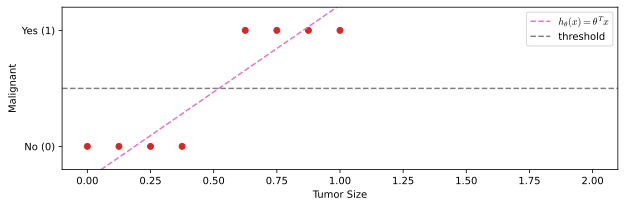

In [3]:
x = np.delete(np.linspace(0, 1, 9), 4)
y = np.hstack([np.zeros(len(x)//2), np.ones(len(x)//2)])
fig, ax = plt.subplots(figsize=(10,3))
ax.set_xlim(-.1, 2.1)
ax.set_ylim(-0.2, 1.2)
ax.plot(x, y, marker='o', markerfacecolor='C3', markeredgecolor='C3', ls='none')
ax.axline((np.mean(x[:4]), 0), slope=1.5, ls='--', c='C6', label='$h_\\theta(x)=\\theta^Tx$')
ax.axhline(0.5, ls='--', c='k', alpha=0.5, label='threshold')
ax.set_ylabel('Malignant')
ax.set_xlabel('Tumor Size')
ax.legend()
ax.set_yticks([0, 1])
ax.set_yticklabels(['No (0)', 'Yes (1)']);

And it seems reasonable because we can imagine to apply a threshold to $y$ at $0.5$ so that:

* If $h_\theta(x) \geq  0.5$ the classifier predicts $y=1$
* If $h_\theta(x) < 0.5$ the classifier predicts $y=0$

However if we add another Tumor size that is much bigger than the previous, $h_\theta(x)$ will also change

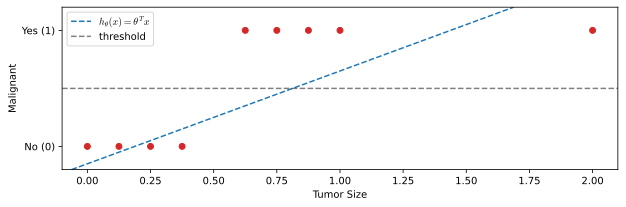

In [4]:
x = np.delete(np.linspace(0, 1, 9), 4)
x = np.r_[x, 2]
y = np.hstack([np.zeros(len(x)//2), np.ones(len(x)//2)])
y = np.r_[y, 1]
fig, ax = plt.subplots(figsize=(10,3))
ax.set_xlim(-.1, 2.1)
ax.set_ylim(-0.2, 1.2)
ax.plot(x, y, marker='o', markerfacecolor='C3', markeredgecolor='C3', ls='none')
ax.axline((np.mean(x[:4]), 0), slope=.8, ls='--', label='$h_\\theta(x)=\\theta^Tx$')
ax.axhline(0.5, ls='--', c='k', alpha=0.5, label='threshold')
ax.set_ylabel('Malignant')
ax.set_xlabel('Tumor Size')
ax.legend()
ax.set_yticks([0, 1])
ax.set_yticklabels(['No (0)', 'Yes (1)']);

If we apply the 0.5 threshold now the we we will classify incorrectly two malignant tumors. When using linear regression for classification problems we might get lucky but in general it is not a good idea. We should instead use logistic regression.

It may be confusing that the term *regression* in logistic regression is associated with classification while linear *regression* is not, but that is just the name that it was given to it for historical reasons.

Logistic regression is a classification algorithm

# Hypothesis representation
The representation of the logistic regression hypothesis should satisfy the output boundaries

$$0 \leq H_\theta(x) \leq 1$$

For linear regression the hypothesis looks like

$$
\begin{equation*}
h_\theta(x) = \theta^Tx
\label{eq:linreg} \tag{1}
\end{equation*}
$$


For logistic regression we will modify $\eqref{eq:linreg}$ to

$$
\begin{equation*}
h_\theta(x) = g\left(\theta^Tx\right)
\label{eq:logreg_compact} \tag{2}
\end{equation*}
$$

Where

$$
\begin{equation*}
g(z)=\frac{1}{1+e^{-z}}
\label{eq:logfunc} \tag{3}
\end{equation*}
$$

$\eqref{eq:logfunc}$ is called Sigmoid function or Logistic function (they are synonyms) and this is the reason for the name of the algorithm (*logistic* regression).

Putting together $\eqref{eq:logreg_compact}$ and $\eqref{eq:logfunc}$ we have

$$
\begin{equation*}
h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}
\label{eq:logreg_full} \tag{4}
\end{equation*}
$$

The output $(y)$ of the sigmoid function

$$\begin{align}
&\lim_{z\to+\infty}g(z) = 1 \\
&\lim_{z\to-\infty}g(z) = 0 \\
&g(0) = \frac{1}{2}
\end{align}$$

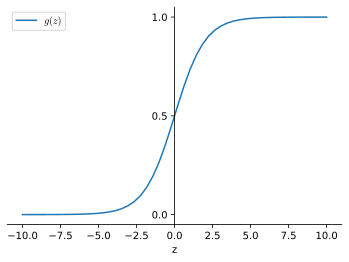

In [5]:
fig, ax = plt.subplots()
z = np.linspace(-10,10)
ax.plot(z, 1/(1+np.e**-z), label='$g(z)$')
ax.legend()
ax.set_xlabel('z')
ax.set_yticks([0, .5, 1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

And so we predict:

$$
\begin{equation*}
y=
\begin{cases}
1, & \text{if } h_\theta(x) \geq 0.5\\
0, & \text{otherwise}
\end{cases}
\label{eq:interpret} \tag{5}
\end{equation*}
$$
 
## Logistic regression output interpretation
The interpretation of the output of the logistic regression hypotheis output is that $y$ represent the probability of the class being positive given a certain $x$ parametrized by $\theta$.

$$
\begin{equation*}
h_\theta(x)= P(y=1|x;\theta)
\label{eq:conditional_prob} \tag{6}
\end{equation*}
$$

Since $y \in \{0,1\}$

$$
\begin{align}
&P(y=0|x;\theta) + P(y=1|x;\theta) = 1 \\
&P(y=0|x;\theta) = 1-P(y=1|x;\theta)
\end{align}
$$

# Decision Boundary
We know $\eqref{eq:interpret}$, now we want to know exactly when $h_\theta(x) \geq 0.5$. Looking at the plot of the sigmoid function we can see that

$$
\begin{equation*}
h_\theta(x) = g(z)
\begin{cases}
\geq 0.5, & \text{if } z \geq 0\\
<0.5, & \text{otherwise }\\
\end{cases}
\end{equation*}
$$

And since $z\equiv\theta^Tx$

$$
\begin{equation*}
h_\theta(x) = g(\theta^Tx)
\begin{cases}
\geq 0.5, & \text{if } \theta^Tx \geq 0\\
<0.5, & \text{otherwise }\\
\end{cases}
\label{eq:cond} \tag{7}
\end{equation*}
$$

This means that if we decide to adopt $0.5$ as a threshold as in $\eqref{eq:interpret}$, if we want to determine if $y=1$ we have to determine if $\theta^Tx \geq 0$

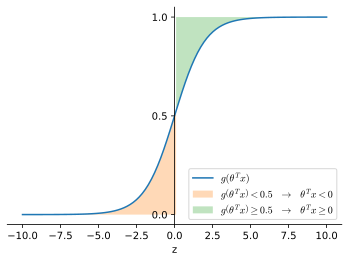

In [6]:
fig, ax = plt.subplots()
n = 100
z = np.linspace(-10,10, n)
g = 1/(1+np.e**-z)
ax.plot(z, g, label='$g(\\theta^Tx)$')
ax.set_xlabel('z')
ax.set_yticks([0, .5, 1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(z[:n//2+1] ,g[:n//2+1], alpha=.3, facecolor='C1',
                label='$g\\left(\\theta^Tx\\right)<0.5\\quad\\to\\quad\\theta^Tx<0$')
ax.fill_between(z[n//2:] ,g[n//2:], 1, alpha=.3, facecolor='C2',
                label='$g\\left(\\theta^Tx\\right)\\geq0.5\\quad\\to\\quad\\theta^Tx\\geq0$')
ax.legend(loc='lower right');

Let's suppose we have a dataset like that on the figure below

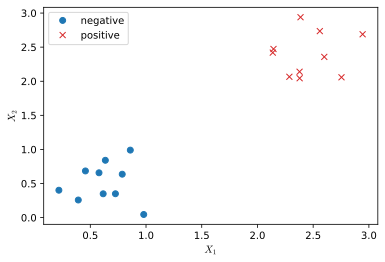

In [7]:
a = np.random.rand(10, 2)
b = np.random.rand(10, 2)+2

fig, ax = plt.subplots()
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.plot(*a.T, ls='none', marker='o', label='negative')
ax.plot(*b.T, ls='none', marker='x', c='C3', label='positive')
ax.legend();

let's supppose that our hypothesis for this dataset is: 

$$
\begin{equation*}
h_\theta(x)=g(\theta_0+\theta_1x_1+\theta_2x_2)
\end{equation*}
\label{eq:loghypothesis} \tag{8}
$$

and that we chose some values for the parameters $\theta_J$ such as the paramter vector $\theta$ is

$$
\theta=
\begin{bmatrix}
3 \\
1 \\
1
\end{bmatrix}
\label{eq:thetat} \tag{9}
$$

Given $\eqref{eq:cond}$, and since $\theta^Tx=-3 +x_1 + x_2$

$$
\begin{equation*}
y=
\begin{cases}
1, & \text{if } -3 +x_1 + x_2 \geq 0\\
0, & \text{otherwise }\\
\end{cases}
\end{equation*}
$$

So for any couple of values $x_1, x_2$, we have $y=1$ whenever $x_1+x_2\geq 3$. This means that we can define a boundary region, at exactly $x_1+x_2=3$, that separates the $X_1,X_2$ space that corresponds to $y=1$ from the space that corresponds to $y=0$ for $\theta$ defined in $\eqref{eq:thetat}$.

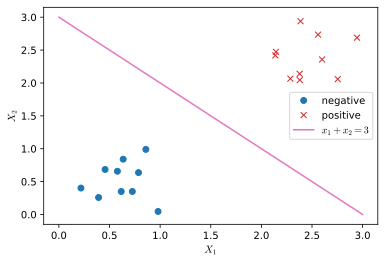

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.plot(*a.T, ls='none', marker='o', label='negative')
ax.plot(*b.T, ls='none', marker='x', c='C3', label='positive')
ax.plot([3, 0], [0, 3] ,c='C6', label='$x_1+x_2=3$')
ax.legend();

This line (in this case $x_1+x_2=3$) is called the **decision boundary** and if defines the points for which $h_\theta(x)=0.5$. The decision boundary is a property of the hypothesis and is independent of the training set ($X$).

Now let's examine a more difficult case and discuss how we could define an hypothesis that   separates the $y=1$ space from the $y=0$ space when our dataset looks like this.

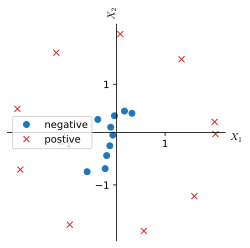

In [9]:
i = np.random.rand(10, 2)*.8
a = i-np.random.rand(10, 2)*.8
z = np.linspace(0, np.pi*2, 10)+i[:,0]*0.2
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.xaxis.set_label_coords(1.05, 0.5)
ax.yaxis.set_label_coords(0.5, 1.05)
ax.plot(*a.T, marker='o', ls='none', label='negative')
ax.plot(np.cos(z)*2, np.sin(z)*2, marker='x', ls='none', c='C3', label='postive')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1]);

As for linear regression also in logistic regression we could add higher order polynomial terms to the features. In this case we could take $\eqref{eq:loghypothesis}$ and add polynomial terms

$$
\begin{align}
h_\theta(x)=g(\theta_0&+\theta_1x_1+\theta_2x_2\\
&+\theta_3x^2_1+\theta_4x^2_2)
\end{align}
$$

Now we have 5 paramters and lets suppose that we chose those parameters such as the vector $\theta$

$$
\theta^T=
\begin{bmatrix}
-1 \\
0 \\
0 \\
1 \\
1
\end{bmatrix}
\label{eq:tetatt} \tag{10}
$$

and $\theta^Tx=-1+x_1^2+x_2^2$. 

So $y=1$ for $x_1^2+x_2^2\geq1$ and the decision boundary is $x_1^2+x_2^2=1$.

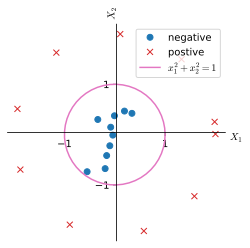

In [10]:
g = np.linspace(0, np.pi*2)
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.xaxis.set_label_coords(1.05, 0.5)
ax.yaxis.set_label_coords(0.5, 1.05)
ax.plot(*a.T, marker='o', ls='none', label='negative')
ax.plot(np.cos(z)*2, np.sin(z)*2, marker='x', ls='none', c='C3', label='postive')
ax.plot(np.cos(g), np.sin(g), c='C6', label='$x_1^2+x_2^2=1$')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1]);